Accuracy: 100.00%
F1 Score: 1.000
Precision: 1.000
Recall: 1.000


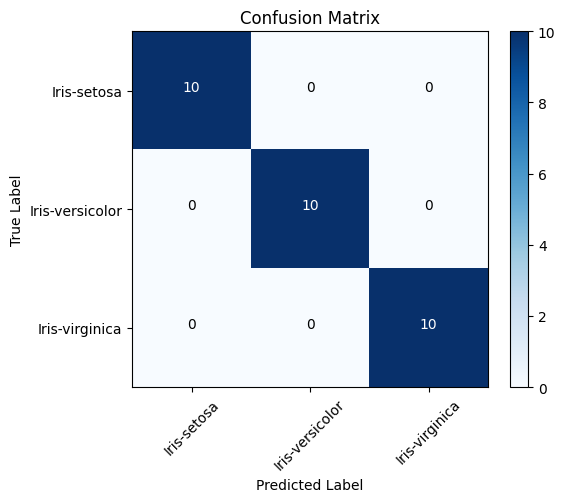

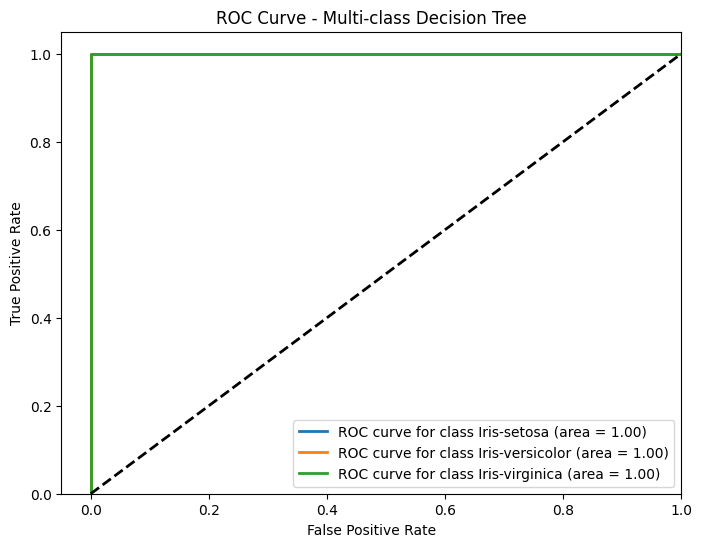

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load dataset from local file
df = pd.read_csv('/content/Iris (4).csv')  # Make sure Iris.csv is in the same folder as this script

# Step 2: Preprocess
X = df.iloc[:, :-1]  # all columns except last are features
y = df.iloc[:, -1]   # last column is target

# Encode target labels (Species) to integers
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Binarize for ROC curve (multi-class) - Binarize the FULL dataset first
y_bin_full = label_binarize(y_enc, classes=np.unique(y_enc))
n_classes = y_bin_full.shape[1]

# Split dataset into train and test sets (80/20 split)
# We split X, y_enc, and the full binarized y to get consistent splits
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(
    X, y_enc, y_bin_full, test_size=0.2, random_state=42, stratify=y_enc
)

# Step 3: Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict on test set and evaluate
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# ROC Curve for multiclass classification
y_score = clf.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(n_classes):
    # Use the binarized true labels for the test set (y_bin_test)
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {le.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Decision Tree')
plt.legend(loc="lower right")
plt.show()